#1: PROBLEM STATEMENT AND PROJECT OVERVIEW

*   For investors to prooperly manage their portfolios, they need to visualize datasets, find useful patterns and gain valuable insights such as stock daily returns and risks.
*   In this project, we visualize stock data and calculate stock returns.



#2: IMPORT DATASETS AND LIBRARIES

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import the necesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
# Read the stock data csv file, here's the list of the stocks considered:

# AAPL = Apple Stock 
# BA = Boeing 
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google 
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

stock_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udemy Python/Data/stock.csv')
stock_df = stock_df[stock_df.columns[1:]]
stock_df


,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500
0,2012-01-12,15.049643,175.929993,75.510002,313.644379,180.550003,12.130000,30.120001,5.650000,1295.500000
1,2012-01-13,14.993214,178.419998,74.599998,311.328064,179.160004,12.350000,30.070000,4.558000,1289.089966
2,2012-01-17,15.167857,181.660004,75.239998,313.116364,180.000000,12.250000,30.250000,5.320000,1293.670044
3,2012-01-18,15.325357,189.440002,75.059998,315.273285,181.070007,12.730000,30.330000,5.362000,1308.040039
4,2012-01-19,15.276786,194.449997,75.559998,318.590851,180.520004,12.800000,30.420000,5.352000,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,146.089996,3341.870117,232.270004,2760.040039,141.250000,39.209999,27.850000,713.760010,4432.350098
2409,2021-08-10,145.600006,3320.679932,235.779999,2761.929932,141.380005,39.720001,28.090000,709.989990,4436.750000
2410,2021-08-11,145.860001,3292.110107,239.490005,2753.790039,142.130005,40.560001,28.160000,707.820007,4442.410156
2411,2021-08-12,148.889999,3303.500000,238.179993,2767.790039,143.070007,40.709999,28.020000,722.250000,4460.830078


In [4]:
# Sort the stock data by date
stock_df.sort_values(by = ['Date'])

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500
0,2012-01-12,15.049643,175.929993,75.510002,313.644379,180.550003,12.130000,30.120001,5.650000,1295.500000
1,2012-01-13,14.993214,178.419998,74.599998,311.328064,179.160004,12.350000,30.070000,4.558000,1289.089966
2,2012-01-17,15.167857,181.660004,75.239998,313.116364,180.000000,12.250000,30.250000,5.320000,1293.670044
3,2012-01-18,15.325357,189.440002,75.059998,315.273285,181.070007,12.730000,30.330000,5.362000,1308.040039
4,2012-01-19,15.276786,194.449997,75.559998,318.590851,180.520004,12.800000,30.420000,5.352000,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,146.089996,3341.870117,232.270004,2760.040039,141.250000,39.209999,27.850000,713.760010,4432.350098
2409,2021-08-10,145.600006,3320.679932,235.779999,2761.929932,141.380005,39.720001,28.090000,709.989990,4436.750000
2410,2021-08-11,145.860001,3292.110107,239.490005,2753.790039,142.130005,40.560001,28.160000,707.820007,4442.410156
2411,2021-08-12,148.889999,3303.500000,238.179993,2767.790039,143.070007,40.709999,28.020000,722.250000,4460.830078


In [5]:
# Print out the number of stocks
# [1:] means skip [0] or Date column 
print(f'Total Number of stocks : {len(stock_df.columns[1:])}')

Total Number of stocks : 9


In [6]:
# Print the name of stocks
for i in stock_df.columns[1:]:
  print(i)

AAPL
AMZN
BA
GOOG
IBM
MGM
T
TSLA
sp500


- **What is the average return of the S&P500?**


In [7]:
print(f'The average return of the S&P500: ${stock_df["sp500"].mean()}')

The average return of the S&P500: $2391.9105299480516


- **Which stock or index has the minimum dispertion from the mean in dollar value?**

In [8]:
print(stock_df.std())

AAPL      32.996732
AMZN     978.619305
BA        98.859198
GOOG     513.266488
IBM       26.280977
MGM        7.688020
T          3.565289
TSLA     181.634751
sp500    725.306351
dtype: float64


- **What is the maximum price for AMZN stock over the specified time period?** 

In [9]:
print(f'Max Amazon price: ${max(stock_df["AMZN"])}')

Max Amazon price: $3731.409912109375


In [10]:
stock_df.describe()

,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500
count,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000
mean,44.890104,1162.773393,192.339789,915.141514,158.522744,24.148475,34.532851,110.649479,2391.910530
std,32.996732,978.619305,98.859198,513.266488,26.280977,7.688020,3.565289,181.634751,725.306351
min,13.947500,175.929993,67.239998,278.481171,94.769997,7.140000,26.500000,4.558000,1278.040039
25%,23.465000,329.320007,126.790001,535.229980,139.339996,19.340000,32.070000,38.748001,1885.079956
50%,31.712500,771.880005,148.139999,779.960022,153.610001,24.469999,34.509998,49.124001,2180.389893
75%,50.782501,1783.760010,259.040009,1166.270020,183.130005,29.200001,37.040001,67.428001,2839.250000
max,149.149994,3731.409912,440.619995,2792.889893,215.800003,44.160000,43.470001,883.090027,4468.000000


#3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [11]:
# Check if data contains any null values
stock_df.isnull().sum()

Date     0
AAPL     0
AMZN     0
BA       0
GOOG     0
IBM      0
MGM      0
T        0
TSLA     0
sp500    0
dtype: int64

In [12]:
# Getting dataframe info
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2413 non-null   object 
 1   AAPL    2413 non-null   float64
 2   AMZN    2413 non-null   float64
 3   BA      2413 non-null   float64
 4   GOOG    2413 non-null   float64
 5   IBM     2413 non-null   float64
 6   MGM     2413 non-null   float64
 7   T       2413 non-null   float64
 8   TSLA    2413 non-null   float64
 9   sp500   2413 non-null   float64
dtypes: float64(9), object(1)
memory usage: 188.6+ KB


In [13]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, simply plot data directly from a Pandas DataFrame using plot() method

def show_plot(df, figure_title):
  df.plot(x='Date', figsize = (15,7), linewidth = 3, title = figure_title)
  plt.grid()
  plt.show()

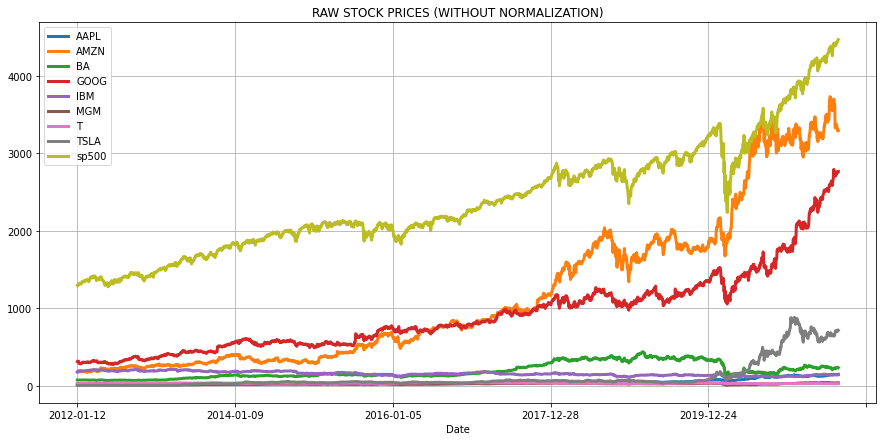

In [14]:
# Plot the data
show_plot(stock_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

- **Print out normalized (scaled) stock prices**  


In [15]:
def normalized(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [16]:
normalized_stock_df = normalized(stock_df)

In [17]:
normalized_stock_df

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996250,1.014153,0.987949,0.992615,0.992301,1.018137,0.998340,0.806726,0.995052
2,2012-01-17,1.007855,1.032570,0.996424,0.998317,0.996954,1.009893,1.004316,0.941593,0.998587
3,2012-01-18,1.018320,1.076792,0.994040,1.005193,1.002880,1.049464,1.006972,0.949027,1.009680
4,2012-01-19,1.015093,1.105269,1.000662,1.015771,0.999834,1.055235,1.009960,0.947257,1.014666
...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,9.707207,18.995454,3.076016,8.799903,0.782332,3.232481,0.924635,126.329203,3.421343
2409,2021-08-10,9.674649,18.875008,3.122500,8.805928,0.783052,3.274526,0.932603,125.661943,3.424739
2410,2021-08-11,9.691925,18.712614,3.171633,8.779976,0.787206,3.343776,0.934927,125.277875,3.429109
2411,2021-08-12,9.893258,18.777355,3.154284,8.824612,0.792412,3.356142,0.930279,127.831856,3.443327


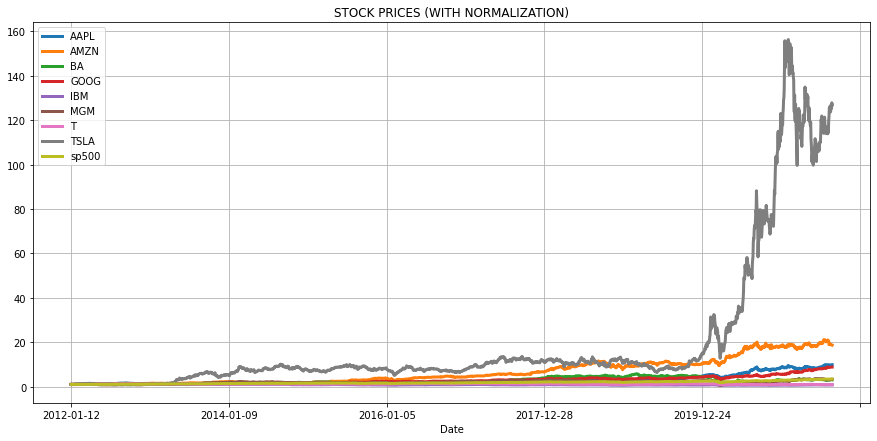

In [18]:
show_plot(normalized_stock_df, 'STOCK PRICES (WITH NORMALIZATION)')

#4: PERFORM INTERACTIVE DATA VISUALIZATION

In [19]:
# Function to perform an interactive data plotting using plotly express
# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively. 
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance. 
def interactive_plot(df, fig_title):
  fig = px.line(title=fig_title)
  for i in df.columns[1:]:
    fig.add_scatter(x=df['Date'],y=df[i],name=i)
  fig.show()

In [20]:
# Plot interactive chart
interactive_plot(stock_df,'Prices (interactive plot)')

* **It seems that most stocks experienced massive drops in 2020, let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 2020. How much did you lose (in $) by March 23rd, 2020?**


In [21]:
#It seems that most stocks experienced massive drops in 2020, let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 2020. How much did you lose (in $) by March 23rd, 2020?
(float(stock_df[(stock_df['Date'])=='2020-02-19']['sp500'])-float(stock_df[(stock_df['Date'])=='2020-03-23']['sp500']))*100

114875.0

* **Plot normalized stock data in an interactive way**

In [22]:
interactive_plot(normalized(stock_df),'Normalized Prices (interactive plot)')

#5: CALCULATE INDIVIDUAL STOCKS DAILY RETURNS

In [23]:
# Let's calculate daily return for a single security
# Let's take the S&P500 as an example first
sp_df = stock_df['sp500'].copy()

In [24]:
sp_daily_return_df = sp_df.copy()

In [25]:
for i in range(1,len(sp_daily_return_df)):
  sp_daily_return_df[i] = ((sp_df[i]-sp_df[i-1])/sp_df[i-1])*100

In [26]:
sp_daily_return_df[0] = 0

In [27]:
sp_daily_return_df

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2408   -0.093991
2409    0.099268
2410    0.127574
2411    0.414638
2412    0.160731
Name: sp500, Length: 2413, dtype: float64


- **Calculate the daily return for Amazon stock.**


In [28]:
amz_df = stock_df['AMZN'].copy()
amz_daily_return_df = amz_df.copy()
for i in range(1,len(amz_df)):
  amz_daily_return_df[i] = ((amz_df[i]-amz_df[i-1])/amz_df[i-1])*100
amz_daily_return_df[0]=0
                                                                                        

In [29]:
amz_daily_return_df

0       0.000000
1       1.415339
2       1.815943
3       4.282725
4       2.644634
          ...   
2408   -0.091775
2409   -0.634082
2410   -0.860361
2411    0.345975
2412   -0.288483
Name: AMZN, Length: 2413, dtype: float64

#6: CALCULATE MULTIPLE STOCKS DAILY RETURNS

In [30]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
  daily_return_df = df.copy()
  for i in df.columns[1:]:
    for j in range(1,len(df)):
      daily_return_df[i][j] = ((df[i][j]-df[i][j-1])/df[i][j-1])*100
    daily_return_df[i][0] = 0
  return daily_return_df

In [31]:
# Get the daily returns 
daily_return_all_df = daily_return(stock_df)

In [32]:
daily_return_all_df

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374952,1.415339,-1.205143,-0.738516,-0.769869,1.813687,-0.166006,-19.327433,-0.494792
2,2012-01-17,1.164817,1.815943,0.857908,0.574410,0.468853,-0.809720,0.598604,16.717860,0.355295
3,2012-01-18,1.038382,4.282725,-0.239235,0.688856,0.594449,3.918364,0.264463,0.789470,1.110793
4,2012-01-19,-0.316936,2.644634,0.666134,1.052283,-0.303752,0.549887,0.296736,-0.186493,0.493866
...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,-0.034216,-0.091775,0.406347,0.704927,-1.970988,-1.507165,-0.393415,2.096987,-0.093991
2409,2021-08-10,-0.335403,-0.634082,1.511170,0.068473,0.092039,1.300694,0.861759,-0.528191,0.099268
2410,2021-08-11,0.178568,-0.860361,1.573504,-0.294718,0.530485,2.114804,0.249198,-0.305636,0.127574
2411,2021-08-12,2.077334,0.345975,-0.547001,0.508390,0.661368,0.369817,-0.497157,2.038653,0.414638


- **Plot the returns vs. time using both static and interactive plots**


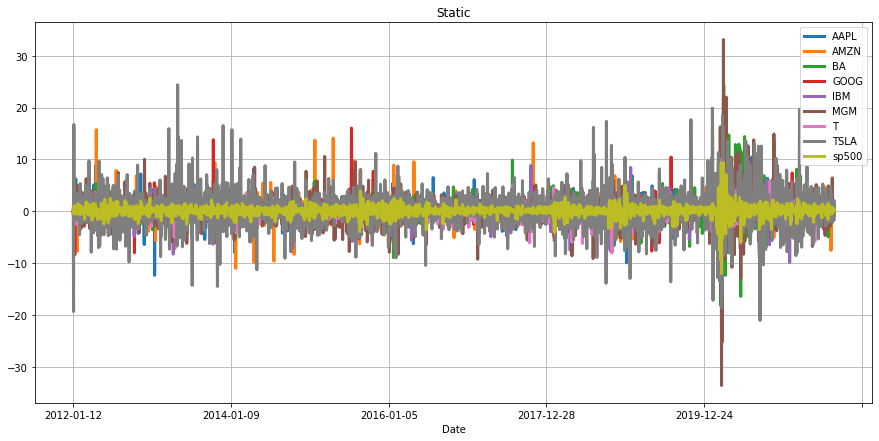

In [33]:
show_plot(daily_return_all_df,'Static')

In [34]:
interactive_plot(daily_return_all_df,'Interactive')

- **What is the maximum daily return in % values**
<br>Ans: approximately 33%

#7: CALCULATE THE CORRELATIONS BETWEEN DAILY RETURNS 

In [35]:
# Daily Return Correlation
corr_cm = daily_return_all_df.drop(columns=['Date']).corr()

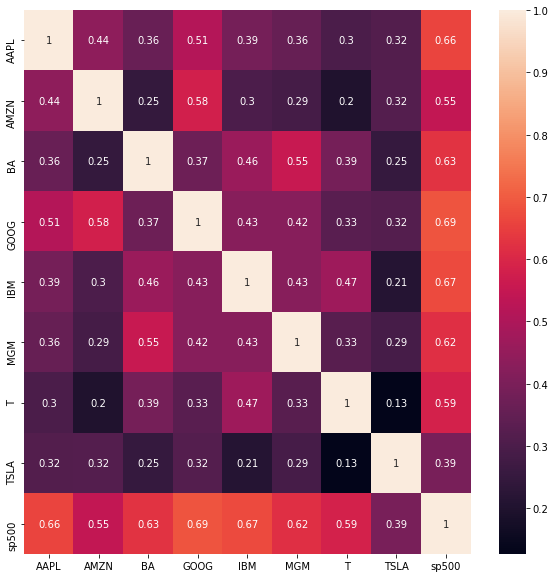

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_cm,annot=True)

- **What are the top 2 stocks that are positively correlated with the S&P500?**
<br> Google (0.68) and IBM (0.7)

- **What is the correlation between Amazon and Boeing? Comment on your answer**
<br>0.27

- **What is the correlation between MGM and Boeing? Comment on your answer**
<br> 0.55

#8: PLOT THE HISTOGRAM FOR DAILY RETURNS

In [37]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Tesla Standard deviation is high indicating a more volatile stock


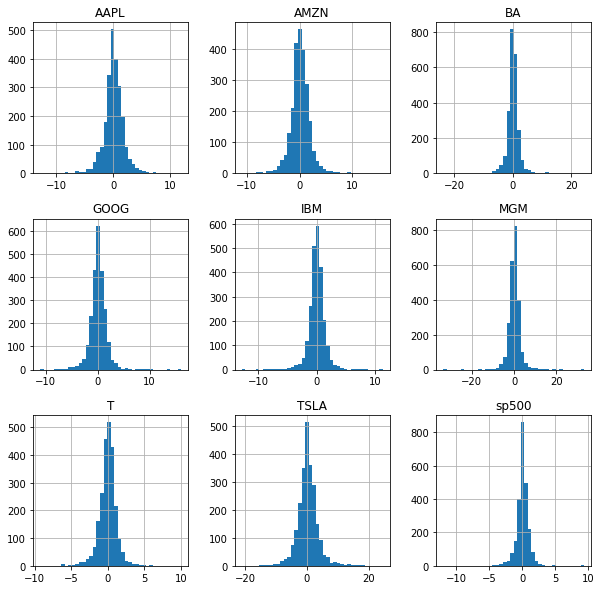

In [38]:
daily_return_all_df.hist(figsize=(10,10), bins=40);

- **Based on the histogram, which of the following stocks are more risky? T or TSLA**

In [39]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
daily_ret_hist_df=daily_return_all_df.copy()
daily_ret_hist_df.drop(columns=['Date'],inplace=True)
daily_ret_list = []
for i in daily_ret_hist_df.columns:
  daily_ret_list.append(daily_return_all_df[i].values)
daily_ret_list

[array([ 0.        , -0.37495182,  1.1648171 , ...,  0.17856765,
         2.07733358,  0.14104823]),
 array([ 0.        ,  1.41533883,  1.81594301, ..., -0.86036067,
         0.34597544, -0.2884828 ]),
 array([ 0.        , -1.20514321,  0.85790805, ...,  1.57350358,
        -0.54700104, -1.56183814]),
 array([ 0.        , -0.73851625,  0.57441001, ..., -0.29471756,
         0.50839025,  0.01192569]),
 array([ 0.        , -0.76986949,  0.4688526 , ...,  0.5304852 ,
         0.66136805,  0.0768752 ]),
 array([ 0.        ,  1.81368726, -0.80971966, ...,  2.11480394,
         0.36981683, -0.73691782]),
 array([ 0.        , -0.16600645,  0.59860428, ...,  0.24919792,
        -0.49715693,  0.60670976]),
 array([  0.        , -19.32743344,  16.71786023, ...,  -0.3056357 ,
          2.03865284,  -0.70335993]),
 array([ 0.        , -0.49479229,  0.35529546, ...,  0.12757438,
         0.41463803,  0.16073067])]

In [40]:
# Plotly's Python API contains a super pwerful module known as figure factory module 
# Figure factory module includes wrapper functions that create unique chart types such as interactive subplots 
# NBoeing, Tesla and MGM gains and losses are sometimes extreme! This indicates a more risky investment. 
fig = ff.create_distplot(daily_ret_list,daily_ret_hist_df.columns)
fig.show()